### Import libraries

In [1]:
import numpy as np
import xclim
import icclim
import xarray as xr
from xclim import indices
import matplotlib as mpl
from scipy import stats as st
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

### Read dataset

In [2]:
path = 'E:/DATASETS/PDIR_Ghana_2000_2022/'
fnames = 'PDIR_Ghana_2022-08-31042842pm_*.nc'

In [3]:
dataset = xr.open_mfdataset(path + fnames, combine = 'by_coords')
dataset

<xarray.Dataset>
Dimensions:   (lon: 113, lat: 163, datetime: 7975)
Coordinates:
  * lon       (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat       (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
  * datetime  (datetime) datetime64[ns] 2000-03-01 2000-03-02 ... 2021-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) int16 dask.array<chunksize=(306, 163, 113), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
dataset = dataset.rename({'datetime':'time'}).precip
dataset.attrs["units"] = "mm / day"
dataset

<xarray.DataArray 'precip' (time: 7975, lat: 163, lon: 113)>
dask.array<concatenate, shape=(7975, 163, 113), dtype=int16, chunksize=(366, 163, 113), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat      (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
  * time     (time) datetime64[ns] 2000-03-01 2000-03-02 ... 2021-12-31
Attributes:
    grid_mapping:  crs
    units:         mm / day

In [5]:
TP = dataset.sel(time =slice('2000', '2019'))
TP

<xarray.DataArray 'precip' (time: 7245, lat: 163, lon: 113)>
dask.array<getitem, shape=(7245, 163, 113), dtype=int16, chunksize=(366, 163, 113), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat      (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
  * time     (time) datetime64[ns] 2000-03-01 2000-03-02 ... 2019-12-31
Attributes:
    grid_mapping:  crs
    units:         mm / day

### Calculating CWD using the xclim & icclim libraries

In [6]:
cwd = xclim.indicators.icclim.CWD(TP, freq = 'D')
cwd

<xarray.DataArray 'CWD' (time: 7245, lat: 163, lon: 113)>
dask.array<where, shape=(7245, 163, 113), dtype=float64, chunksize=(1, 163, 113), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-03-01 2000-03-02 ... 2019-12-31
  * lon      (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.08 1.12 1.16 1.2
  * lat      (lat) float32 11.24 11.2 11.16 11.12 11.08 ... 4.88 4.84 4.8 4.76
Attributes:
    units:          days
    cell_methods:    time: sum over days
    history:        [2023-02-01 16:20:02] CWD: icclim.CWD(pr=precip, freq='D'...
    long_name:      Maximum number of consecutive wet days (rr≥1 mm)
    standard_name:  number_of_days_with_lwe_thickness_of_precipitation_amount...
    description:    D maximum number of consecutive days with daily precipita...

#### GROUPING THE cwd DATA INTO YEAR

In [7]:
wd = cwd.groupby('time.year').sum('time')
CWD = wd.where(wd != 0, drop=True)
CWD

<xarray.DataArray 'CWD' (year: 20, lat: 161, lon: 112)>
dask.array<where, shape=(20, 161, 112), dtype=float64, chunksize=(1, 161, 112), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -3.28 -3.24 -3.2 -3.16 -3.12 ... 1.04 1.08 1.12 1.16
  * lat      (lat) float32 11.16 11.12 11.08 11.04 11.0 ... 4.88 4.84 4.8 4.76
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2015 2016 2017 2018 2019

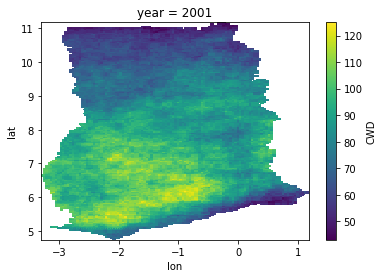

In [8]:
a = CWD.sel(year = 2001)
a.where(a != 0, drop=True).plot()

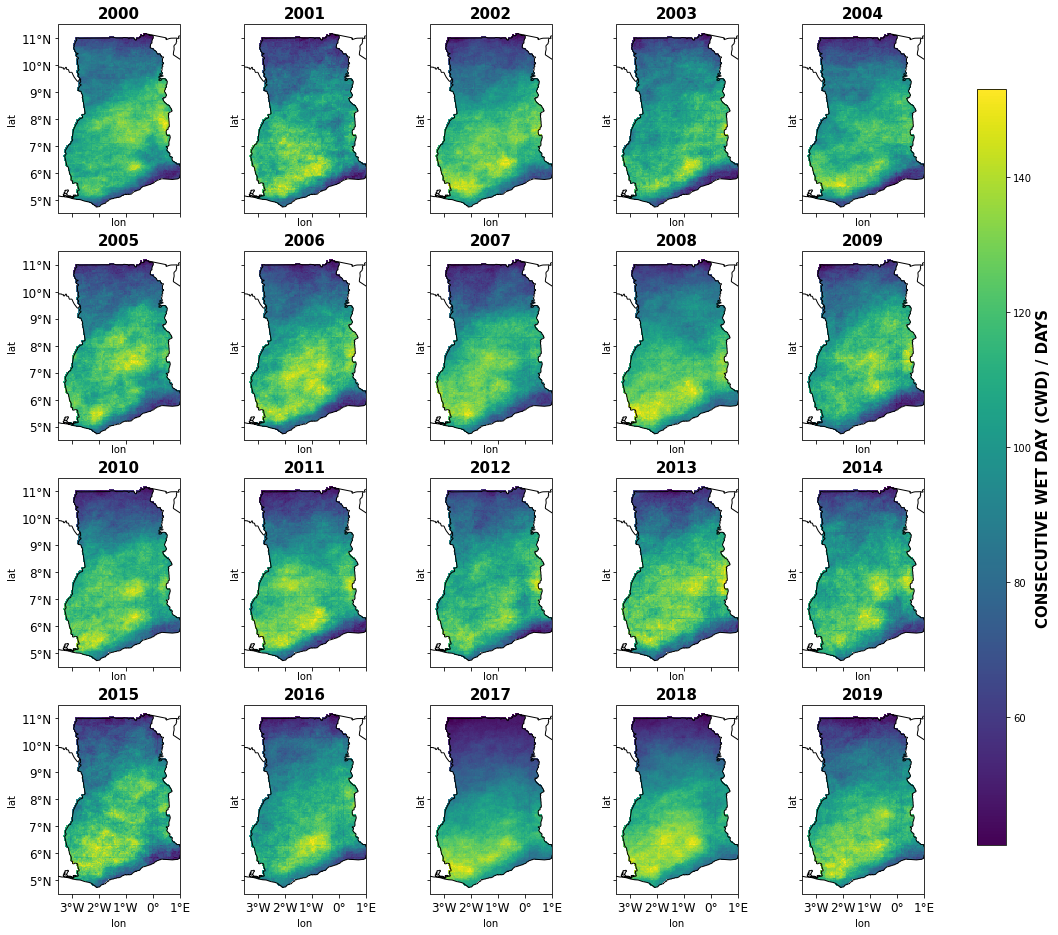

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=5, subplot_kw = dict(projection = ccrs.PlateCarree()), 
                         figsize=(20,15), sharex = True, sharey = True)
plt.subplots_adjust(wspace=-0.5, top=0.93)#(bottom=0.25, right=0.95, top=0.9, hspace = 0.25)


ax = axes.flatten()

Titles = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
          '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
xlabels = (['-3','-2','-1','0','1'])
ylabels = (['5','6','7','8','9','10','11'])

for i, a in enumerate(ax):
    
    ax[i].coastlines()
    ax[i].add_feature(cf.BORDERS)
    ax[i].set_extent([-3.5,1,4.5, 11.5])
    ax[i].set_xticks([-3,-2,-1,0,1], crs=ccrs.PlateCarree()) 
    ax[i].set_yticks([5,6,7,8,9,10,11], crs=ccrs.PlateCarree())
    
    

    ax[i].set_xticklabels(xlabels, fontsize = 12)#, fontweight = 'bold')
    ax[i].set_yticklabels(ylabels, fontsize = 12)#, fontweight = 'bold')
    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    
    #ax[i].set_xlabel('Longitude', fontsize = 15, fontweight = 'bold')
    #ax[i].set_ylabel('Latitude', fontsize = 15, fontweight = 'bold')
    
       
    #plotting the R20mm
    tp = CWD[i].plot(cmap='viridis', ax = ax[i], add_colorbar = False)
    
    #setting titles
    ax[i].set_title(Titles[i], fontsize = 15, fontweight = 'bold')

    
cbar_ax = fig.add_axes([0.85, 0.17, 0.02, 0.7])

cbar=fig.colorbar(tp, cax=cbar_ax, orientation='vertical' )

cbar.set_label(label = 'CONSECUTIVE WET DAY (CWD) / DAYS',size=15, weight='bold')


#plt.savefig('CWD_PDIR.png', dpi = 200)
#plt.savefig('CWD_PDIR.jpg', dpi = 200)
#plt.savefig('CWD_PDIR.pdf', dpi = 200)